In [17]:
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import cycler
import genius_keys
import requests
import json
import cycler
import numpy as np

In [45]:
final_df = pd.read_csv('final_from_api.csv')

In [46]:
final_df.drop_duplicates(keep="first", inplace=True)
final_df.dropna(subset=['views'], inplace=True)

In [19]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,

    'figure.facecolor': '#000000',
    
### AXES
    'axes.facecolor': '#000000',
    'axes.edgecolor': '#000000',
    'axes.grid.axis': 'y',
    'axes.linewidth': 0.8,
    'axes.grid': True,
    'axes.titlesize': 'medium',
    'axes.labelweight': 'normal',  # weight of the x and y labels
    'axes.labelcolor': 'black',
    'axes.axisbelow': 'line',
    "axes.spines.left" : False,
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    'axes.axisbelow': True,
#    'axes.prop_cycle': cycler('color', ['#673AB7', '#80DEEA', '#FFD600', '#FF9E80', '#CCFF90', '#8c564b', 
#                                        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
#axes.xmargin        : .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin        : .05  # y margin See `axes.Axes.margins`

## LINES
    'lines.linewidth': 1.5,
    'lines.linestyle': '-',

## LEGEND
   'legend.frameon': True,     
    'legend.framealpha': 0.8,   
    'legend.facecolor': 'inherit',
    #'legend.edgecolor': 0.8,     
    'legend.fancybox': True,     

## FONT
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.variant': 'normal',
    'font.weight': 'medium',
    'font.stretch': 'normal',
    'font.size': 19,
    
## GRID
    'grid.color': '#FFFD7D',
    "grid.linewidth": 0.4,
    'grid.linestyle': '-.',
    'grid.alpha': 1.0,
    
    
## TICKS
    'xtick.bottom': False,
    'xtick.color': '#FFFD7D',
    'xtick.direction': 'in',
    'xtick.labelbottom': True,
    'xtick.labelsize': 'medium',
#    'xtick.labeltop': False,
#    'xtick.major.bottom': True,
    'xtick.major.pad': 3.5,
#    'xtick.major.size': 3.0,
#    'xtick.major.top': True,
    'xtick.major.width': 1,
#    'xtick.minor.bottom': True,
#    'xtick.minor.pad': 3.4,
#    'xtick.minor.size': 2.0,
#    'xtick.minor.top': True,
#    'xtick.minor.visible': False,
#    'xtick.minor.width': 0.6,
#    'xtick.top': False,
#    'ytick.alignment': 'center_baseline',
   'ytick.color': '#FFFD7D',
#    'ytick.direction': 'in',
    'ytick.labelleft': True,
#    'ytick.labelright': False,
#    'ytick.labelsize': 'medium',
    'ytick.left': False,
#    'ytick.major.left': True,
#    'ytick.major.pad': 3.5,
#    'ytick.major.right': True,
#    'ytick.major.size': 0.0,
#    'ytick.major.width': 0.8,
#    'ytick.minor.left': True,
#    'ytick.minor.pad': 3.4,
#    'ytick.minor.right': True,
#    'ytick.minor.size': 0.0,
#    'ytick.minor.visible': False,
#    'ytick.minor.width': 0.6,
#    'ytick.right': False
})

In [47]:
len(final_df)

8763

In [48]:
final_df.drop_duplicates(subset=['title'], keep="first", inplace=True)

In [49]:
len(final_df)

7655

In [50]:
final_df.replace({
    'Joey Bada$$': 'Joey Badass',
    'Joey Bada$$ & XXXTENTACION': 'Joey Badass & XXXTENTACION'
}, inplace=True)

In [51]:
final_df['views'] = final_df['views'].astype(int)
final_df.head()

,annotations,artists,title,views
0,13,Travis Scott,Days Before Rodeo: The Prayer,231388
1,12,Travis Scott,Quintana,215341
2,9,Travis Scott,Quintana Pt. 2,212842
3,14,PARTYNEXTDOOR,Jus Know,211356
4,12,Travis Scott,5% TINT,236835


In [52]:
final_df[final_df.artists=='Luis Fonsi & Daddy Yankee']

,annotations,artists,title,views
10,18,Luis Fonsi & Daddy Yankee,Despacito (Remix),22116164
12,0,Luis Fonsi & Daddy Yankee,Despacito (Major Lazer & MOSKA Remix),8050


In [53]:
final_df['counting'] = final_df['artists'].map(final_df['artists'].value_counts())
final_df['counting'] = final_df['counting'].astype(int)
final_df['counting'].dtype
final_df.head()

,annotations,artists,title,views,counting
0,13,Travis Scott,Days Before Rodeo: The Prayer,231388,104
1,12,Travis Scott,Quintana,215341,104
2,9,Travis Scott,Quintana Pt. 2,212842,104
3,14,PARTYNEXTDOOR,Jus Know,211356,12
4,12,Travis Scott,5% TINT,236835,104


In [54]:
kenny = final_df[final_df.artists=='Kendrick Lamar']
kenny.head()

,annotations,artists,title,views,counting
29,40,Kendrick Lamar,"Bitch, Don't Kill My Vibe",4192070,190
63,101,Kendrick Lamar,"Sing About Me, I'm Dying of Thirst",2090807,190
139,52,Kendrick Lamar,Untitled 8 (Blue Faces),294300,190
343,50,Kendrick Lamar,​untitled 02 | 06.23.2014.,951593,190
612,21,Kendrick Lamar,LOYALTY.,2379147,190


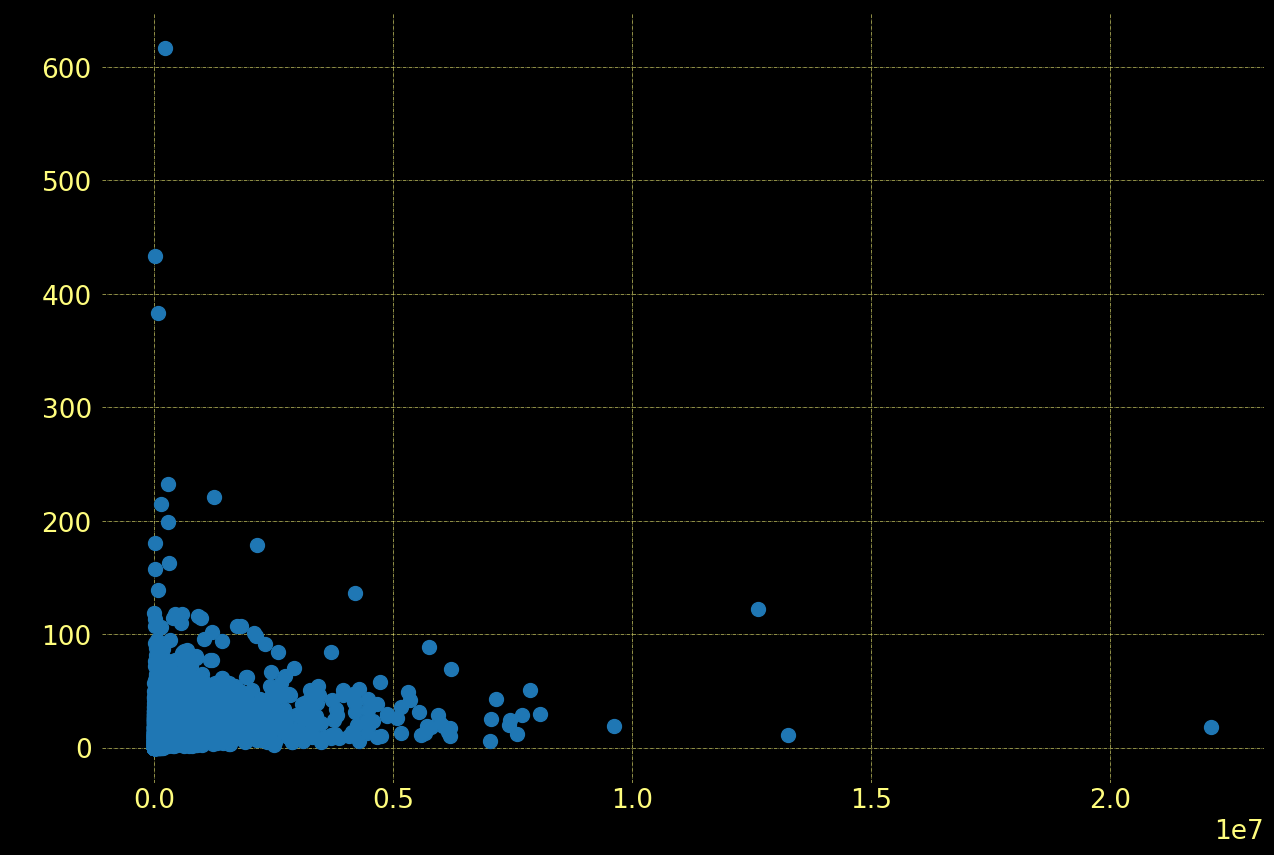

In [20]:
#fig, ax = plt.subplots()
#final_df.groupby('artists').plot(x='views', y='annotations', marker='o', linestyle='', ax=ax, figsize=(15,10))

final_df.plot(kind='scatter', y='annotations', x='views', s=100, figsize=(15,10))

In [64]:
def get_color(artists):
    if artists == 'Kendrick Lamar':
        return '#ADEFAC'
    else:
        return '#E9E9E9'
bar_colors = [get_color(artists) for artists in all_views.artists]

In [22]:
def get_size(counting):
    if counting == 190:
        return counting
    else:
        return counting/10
sizes = [get_size(counting) for counting in final_df.counting]

In [23]:
#final_df.plot(kind='scatter', x='annotations', y='views', marker='o', s=sizes, figsize=(15,10), color=bar_colors, legend=False)

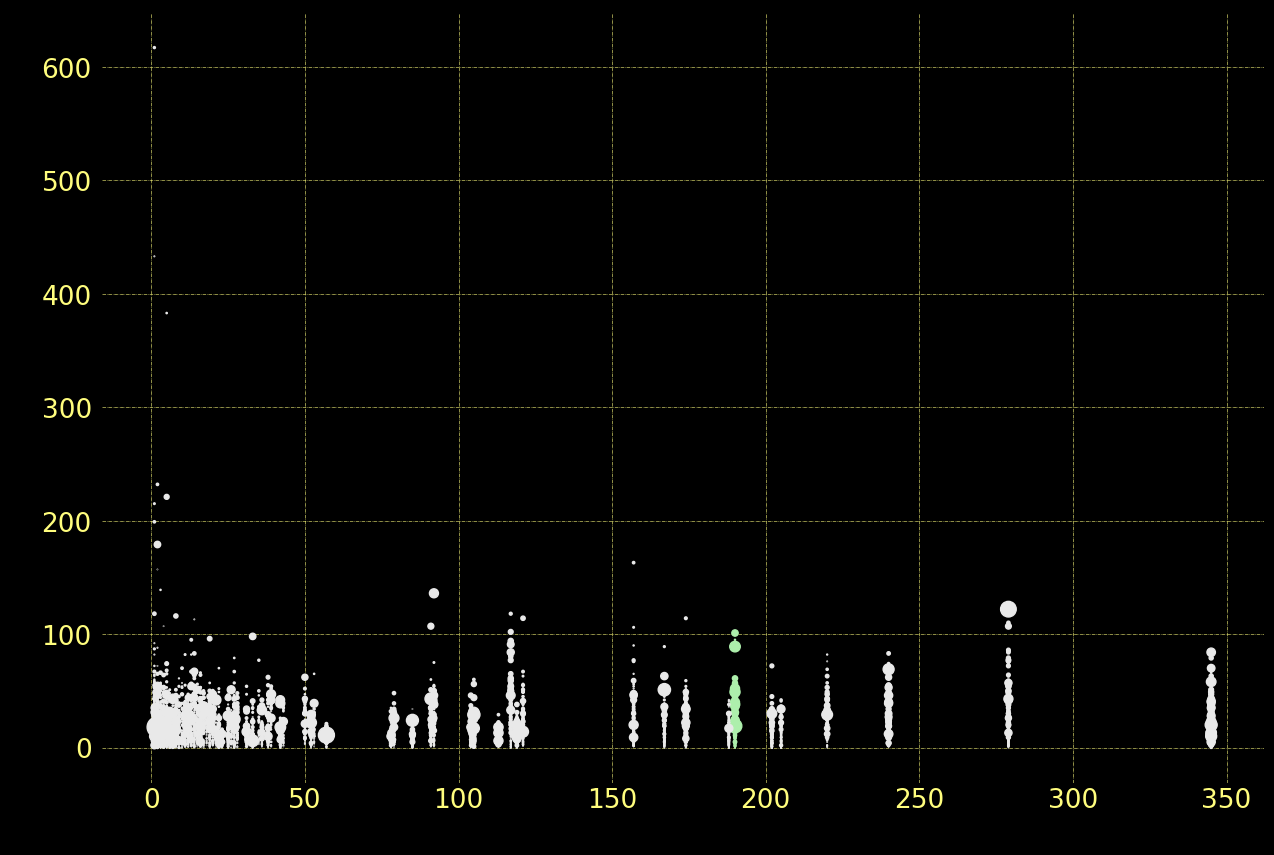

In [27]:
final_df.plot(kind='scatter', y='annotations', x='counting', s=final_df.views/100000, figsize=(15,10), color=bar_colors)
plt.savefig('genius_annotations.pdf', facecolor=plt.rcParams['figure.facecolor'])

In [55]:
final_df[final_df.annotations>240]

,annotations,artists,title,views,counting
513,383,Rap Genius,Rap Names Explained,88989,5
5975,617,Emoji Genius,List of Emoji Names,223365,1
9323,433,Genius Deutschland,Begriffe der Drogenszene,24258,1


In [69]:
final_df = final_df[final_df.annotations<240]
final_df.head()

,annotations,artists,title,views,counting
0,13,Travis Scott,Days Before Rodeo: The Prayer,231388,104
1,12,Travis Scott,Quintana,215341,104
2,9,Travis Scott,Quintana Pt. 2,212842,104
3,14,PARTYNEXTDOOR,Jus Know,211356,12
4,12,Travis Scott,5% TINT,236835,104


AttributeError: Cannot access callable attribute 'reset_index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [102]:
all_views = final_df.groupby('artists')['annotations', 'views', 'counting'].sum().sort_values(by='views', ascending=False).reset_index().head(20)
all_views.head()

,artists,annotations,views,counting
0,Drake,4910,210749179,119025
1,Kendrick Lamar,4082,105662966,36100
2,Kanye West,5375,100037356,57600
3,Eminem,7060,92435105,77841
4,The Weeknd,1167,69948088,14161


In [107]:
all_views['normalized'] = final_df['counting']
all_views

,artists,annotations,views,counting,normalized
0,Drake,4910,210749179,119025,104.0
1,Kendrick Lamar,4082,105662966,36100,104.0
2,Kanye West,5375,100037356,57600,104.0
3,Eminem,7060,92435105,77841,12.0
4,The Weeknd,1167,69948088,14161,104.0
5,J. Cole,3718,61162101,30276,11.0
6,Lin-Manuel Miranda,3160,48491552,13689,104.0
7,JAY-Z,5741,44608351,48400,240.0
8,XXXTENTACION,851,42498416,12769,240.0
9,Beyoncé,1055,38847352,11025,104.0


In [90]:
all_annotations = final_df.groupby('artists').annotations.sum().sort_values(ascending=False).reset_index()
all_annotations.head()

,artists,annotations
0,Eminem,7060
1,JAY-Z,5741
2,Kanye West,5375
3,Drake,4910
4,Childish Gambino,4281


In [149]:
drizzy = final_df[final_df.artists=='Drake']
len(drizzy)

345

In [153]:
kungfukenny = final_df[final_df.artists=='Kendrick Lamar']
kungfukenny.head()

,annotations,artists,title,views,counting
29,40,Kendrick Lamar,"Bitch, Don't Kill My Vibe",4192070,190
63,101,Kendrick Lamar,"Sing About Me, I'm Dying of Thirst",2090807,190
139,52,Kendrick Lamar,Untitled 8 (Blue Faces),294300,190
343,50,Kendrick Lamar,​untitled 02 | 06.23.2014.,951593,190
612,21,Kendrick Lamar,LOYALTY.,2379147,190


In [155]:
eminem = final_df[final_df.artists=='Eminem']
eminem.head()

,annotations,artists,title,views,counting
16,13,Eminem,River,2686436,279
177,122,Eminem,Rap God,12641073,279
178,43,Eminem,The Monster,4180453,279
179,42,Eminem,Lose Yourself,3248462,279
180,57,Eminem,Berzerk,2655461,279


In [156]:
lin = final_df[final_df.artists=='Lin-Manuel Miranda']
lin.head()

,annotations,artists,title,views,counting
72,62,Lin-Manuel Miranda,The Election of 1800,603648,117
2328,94,Lin-Manuel Miranda,Non-Stop,1412742,117
2463,47,Lin-Manuel Miranda,It's Quiet Uptown,789814,117
3305,46,Lin-Manuel Miranda,Alexander Hamilton,3943005,117
3532,17,Lin-Manuel Miranda,History Has Its Eyes On You,531115,117


In [157]:
beyonce = final_df[final_df.artists=='Beyoncé']
beyonce.head()

,annotations,artists,title,views,counting
78,29,Beyoncé,Drunk in Love,7690943,105
368,15,Beyoncé,Crazy in Love,267301,105
866,27,Beyoncé,FREEDOM,685678,105
914,18,Beyoncé,Jealous,493703,105
1211,28,Beyoncé,FREEDOM (2016 BET Awards),8707,105


In [159]:
jay_z = final_df[final_df.artists=='JAY-Z']
jay_z.head()

,annotations,artists,title,views,counting
214,49,JAY-Z,Renegade,773105,220
285,31,JAY-Z,Moment of Clarity,312992,220
580,18,JAY-Z,8 Miles and Runnin',26079,220
1640,33,JAY-Z,Part II (On The Run),2219201,220
1644,37,JAY-Z,Tom Ford,1571235,220


In [160]:
future = final_df[final_df.artists=='Future']
future.head()

,annotations,artists,title,views,counting
872,39,Future,Mask Off (Remix),600308,202
1414,34,Future,Where Ya At,1198126,202
1481,72,Future,Move That Dope,764382,202
1624,13,Future,Drippin (How U Luv That),186832,202
1882,30,Future,Low Life,2025163,202


In [151]:
def get_color(artists):
    if artists == 'Kendrick Lamar':
        return '#ADEFAC'
    else:
        return '#E9E9E9'
combat_colors = [get_color(artists) for artists in combat_zone.artists]

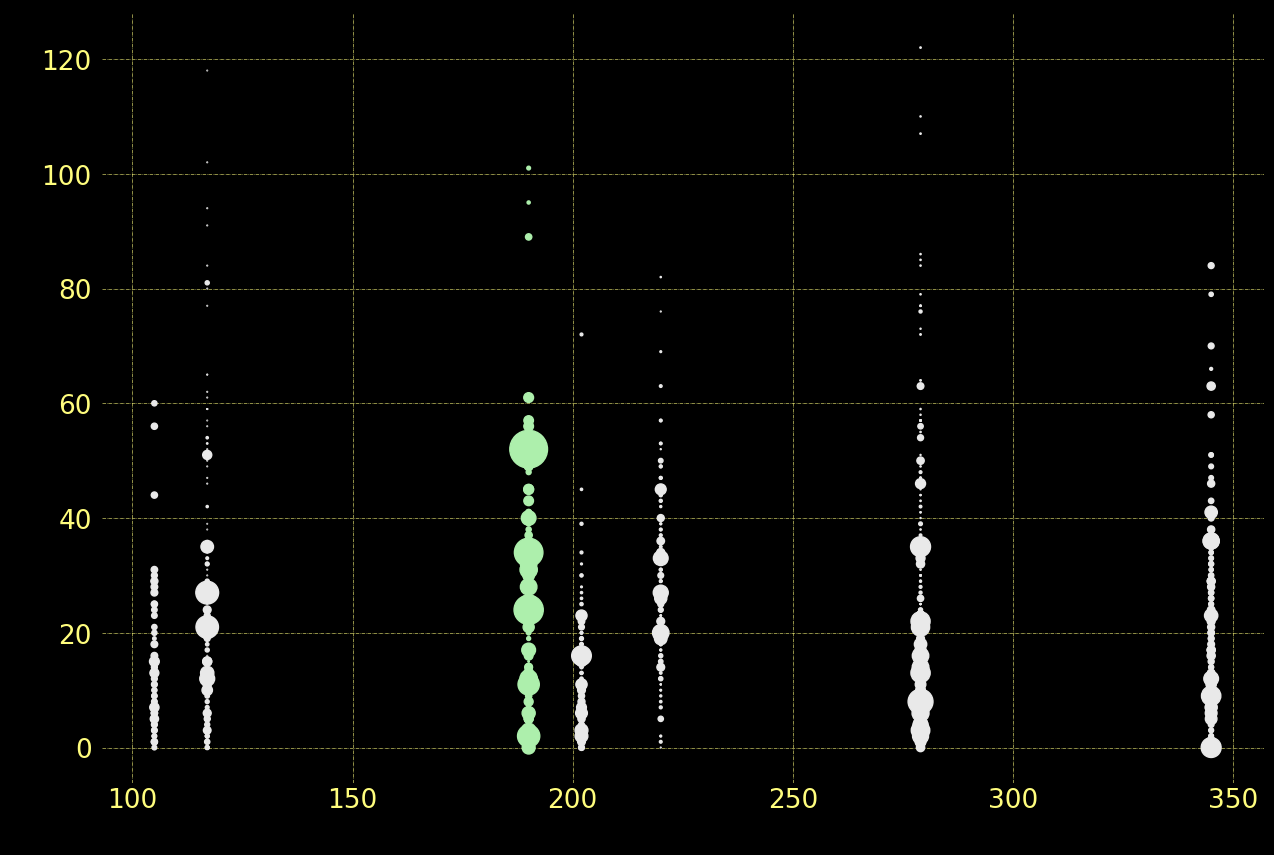

In [152]:
combat_zone = pd.concat([kungfukenny, drizzy, eminem, beyonce, jay_z, lin, future])
combat_zone.plot(kind='scatter', x='counting', y='annotations', color=combat_colors, s=final_df.views/30000, figsize=[15,10])
plt.savefig('genius_combat_zone.pdf', facecolor=plt.rcParams['figure.facecolor'])

In [458]:
final_df.head()

,annotations,artists,title,views,counting
0,13,Travis Scott,Days Before Rodeo: The Prayer,231388,104
1,12,Travis Scott,Quintana,215341,104
2,9,Travis Scott,Quintana Pt. 2,212842,104
3,14,PARTYNEXTDOOR,Jus Know,211356,12
4,12,Travis Scott,5% TINT,236835,104


In [548]:
final_df[final_df.annotations > 200]

,annotations,artists,title,views,counting
293,232,Shady Records,Shady CXVPHER,290733,2
513,383,Rap Genius,Rap Names Explained,88989,5
3838,221,Rap Genius,Top 100 Rap Songs of 2013,1249846,5
3878,215,URLtv,Loaded Lux vs Calicoe,144342,1
5975,617,Emoji Genius,List of Emoji Names,223365,1
9323,433,Genius Deutschland,Begriffe der Drogenszene,24258,1


In [549]:
all_artists_views = final_df.groupby('artists').views.sum().sort_values(ascending=False).reset_index().head(20)

In [116]:
all_artists_views_mean = final_df.groupby('artists').views.mean().sort_values(ascending=False).reset_index()
means = all_artists_views_mean[all_artists_views_mean.artists=='Drake']

In [128]:
genius_artists = all_artists_views_mean[
    (all_artists_views_mean.artists=='Drake') |  
    (all_artists_views_mean.artists=='Nicki Minaj') |  
    (all_artists_views_mean.artists=='Kendrick Lamar') |  
    (all_artists_views_mean.artists=='Lin-Manuel Miranda') |  
    (all_artists_views_mean.artists=='Beyoncé') |  
    (all_artists_views_mean.artists=='JAY-Z') |  
    (all_artists_views_mean.artists=='Future') |  
    (all_artists_views_mean.artists=='Eminem')]
genius_artists.views = genius_artists.views.round().astype(int)

/Users/hatr/.pyenv/versions/3.6.3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [131]:
genius_colors = [get_color(artists) for artists in genius_artists.artists]

In [133]:
genius_artists.artists

82            Nicki Minaj
93                  Drake
103        Kendrick Lamar
169    Lin-Manuel Miranda
201               Beyoncé
236                Eminem
378                 JAY-Z
421                Future
Name: artists, dtype: object

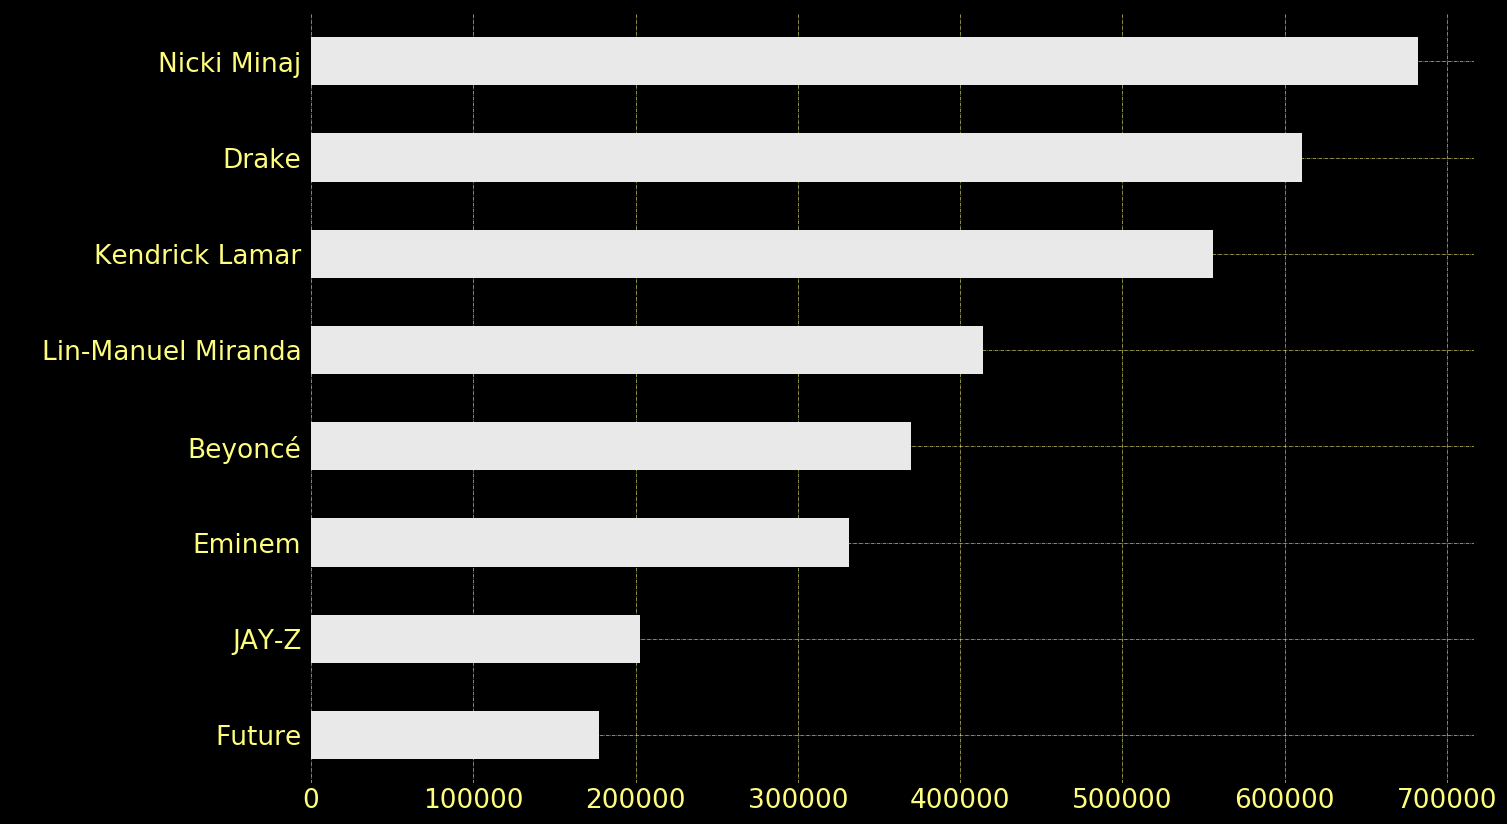

In [137]:
genius_artists.sort_values(by='views', ascending=True).plot(kind='barh', x='artists', legend=False, color=genius_colors, figsize=(15,10))

In [557]:
def get_color(artists):
    if artists == 'Hugh Jackman':
        return '#ADEFAC'
    else:
        return '#E9E9E9'
jackman_colors = [get_color(artists) for artists in all_artists_views_mean.artists.sort_values(ascending=False)]

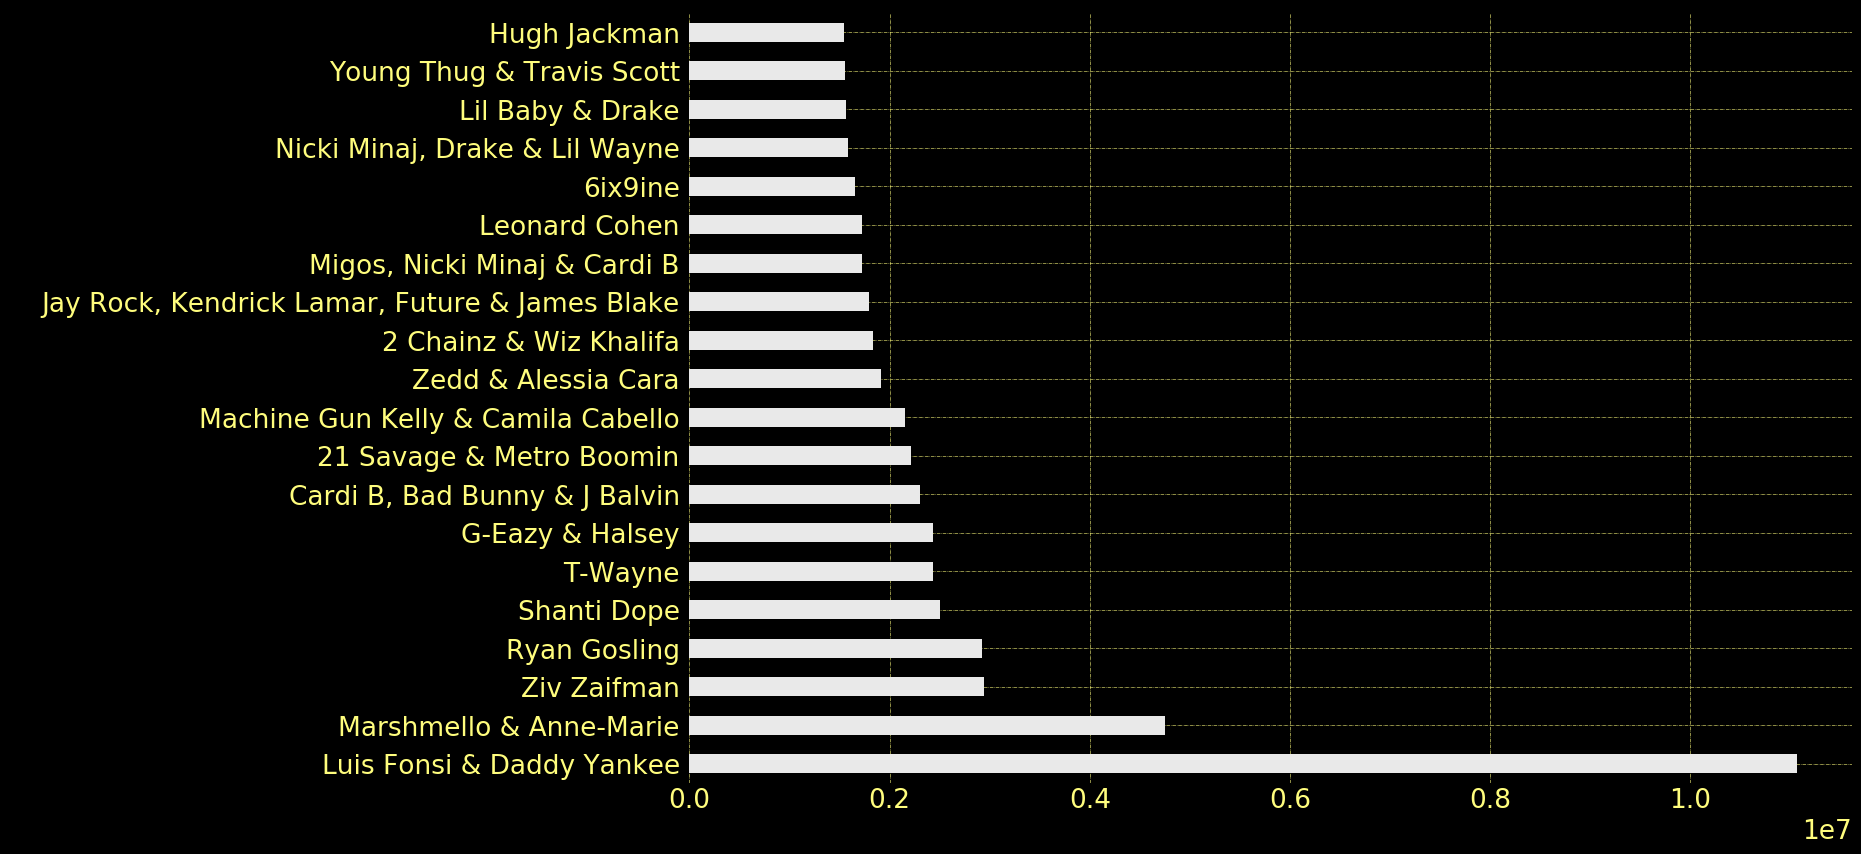

In [561]:
all_artists_views_mean.plot(kind='barh', x='artists', legend=False, color=jackman_colors, figsize=(15,10))

In [545]:
def get_color(artists):
    if artists == 'Kendrick Lamar':
        return '#ADEFAC'
    else:
        return '#E9E9E9'
all_colors = [get_color(artists) for artists in all_artists.artists]

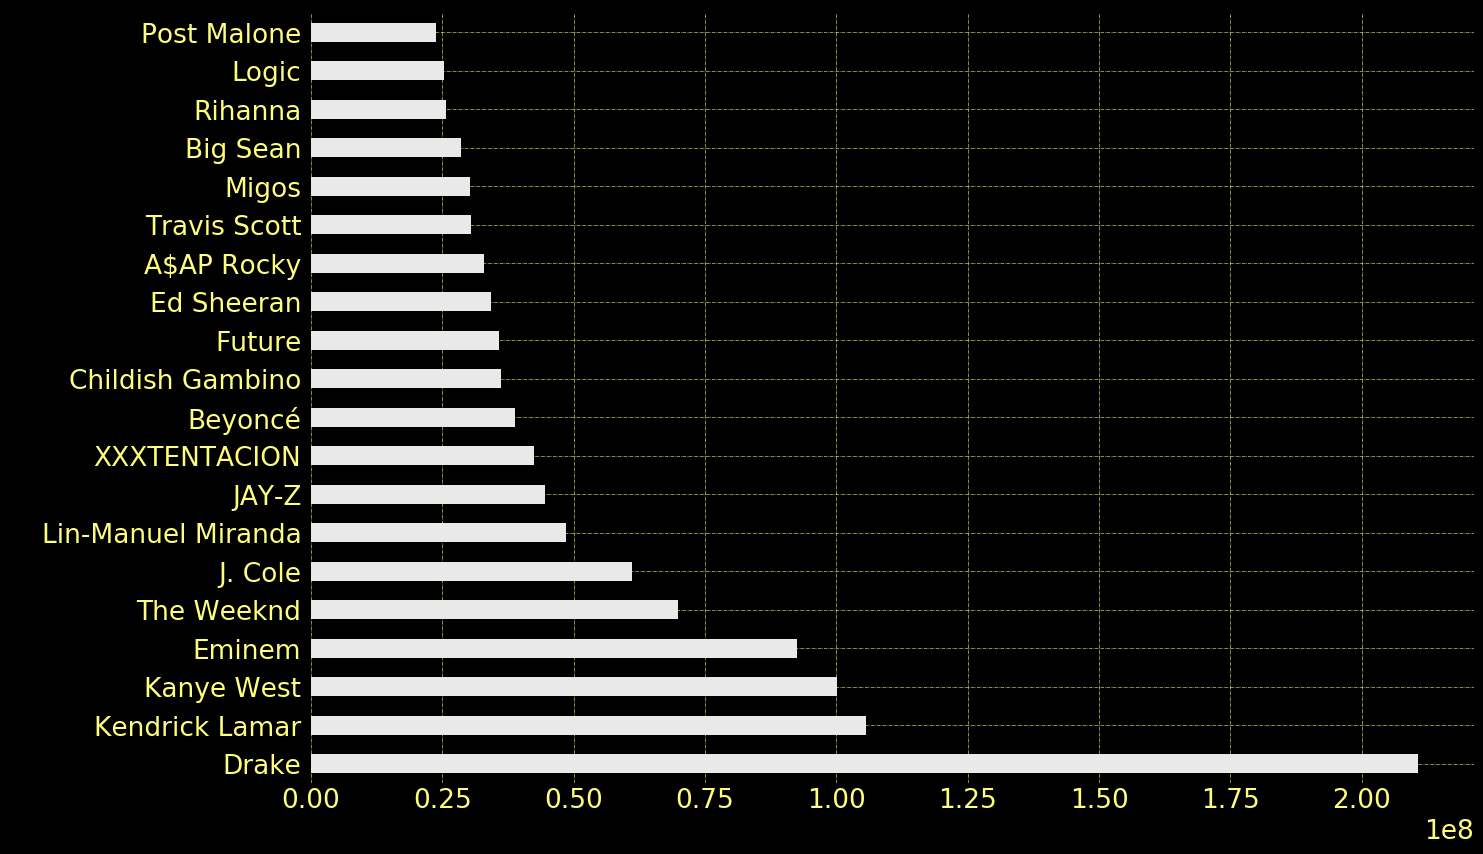

In [546]:
all_artists.plot(kind='barh', x='artists', legend=False, color=all_colors, figsize=(15,10))